# **This file is a complete start to finish project of the advanced data anaylitcs course project condensed into a single project.** Make Teablu part

The senerio i will be working through is using data collected by a taxi driving company i will attempt to find any new insights from the data that could help imporve profits, customer satisfaction or any other insights that may prove useful 

Payment_type 

A numeric code signifying how the passenger paid for the trip.  

1= Credit card 

2= Cash 

3= No charge 

4= Dispute 

5= Unknown 

6= Voided trip

RateCodeID 

The final rate code in effect at the end of the trip. 

1= Standard rate 

2=JFK 

3=Newark 

4=Nassau or Westchester 

5=Negotiated fare 

6=Group ride

VendorID

A code indicating the TPEP provider that provided the record.  

1= Creative Mobile Technologies, LLC; 

2= VeriFone Inc.

# EDA 
here we will clean our data by removing any problem data and making sure everything is the appropriate type

In [2]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

#machine learning packages 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


file_path = r'C:\Users\Tyler\OneDrive\Documents\GitHub\Data_Test\2017_Yellow_Taxi_Trip_Data.csv'
df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Here i notice our pickup and drop off times are object and converting them to datetime we be needed for our anaylisis. lets also create a new duration column as well while were at it. As well as a day and month columns. 

Lastly we will drop any duplicates and check the shape to see how many rows were lost. looks like only about 70 we duplicate values.

In [4]:
# Convert datetime columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
# Create `duration` column
df['duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds().astype(float)
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df.drop_duplicates()
df.shape


(22699, 21)

In [5]:
df.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,1020.826600
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-1019.000000
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,399.000000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,671.000000
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,1103.000000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,86373.000000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,3719.788923


There is a few thing to note here there is some negative fare amounts. Lets examine some of that data to look at these outliers 

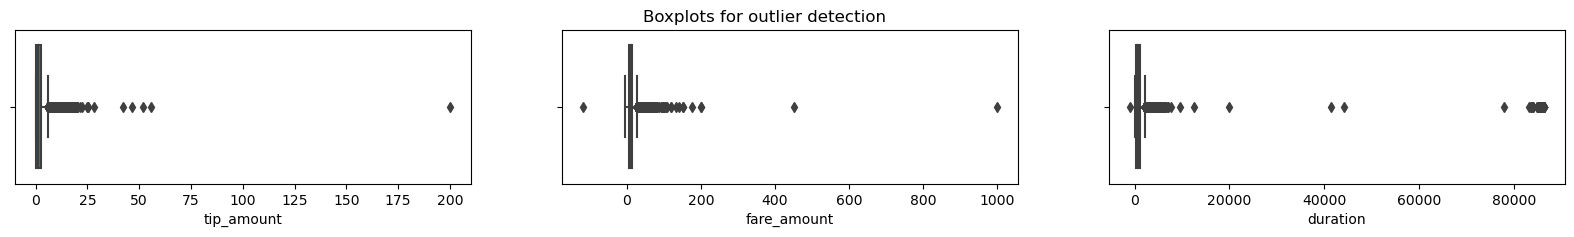

In [6]:
# Create box plot of tip_amount
fig, axes = plt.subplots(1, 3, figsize=(20, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['tip_amount'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

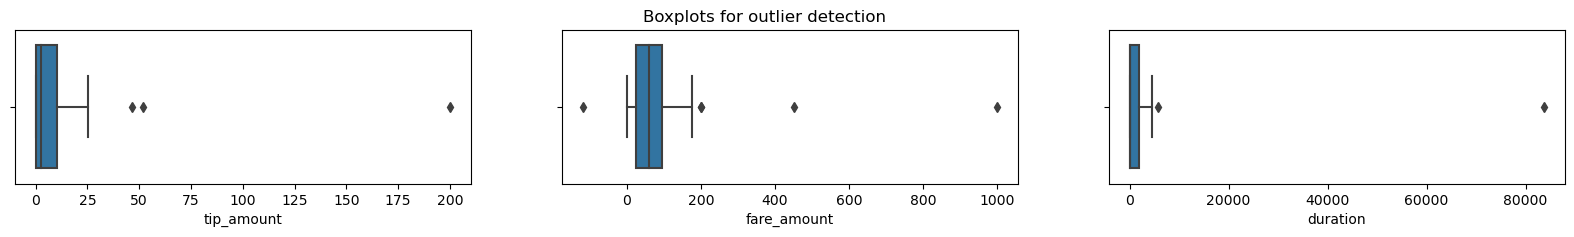

In [7]:
#Check the outliers assumed to be in the negociated rate catagory  
df_sub=df[df['RatecodeID']==5]
fig, axes = plt.subplots(1, 3, figsize=(20, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df_sub['tip_amount'])
sns.boxplot(ax=axes[1], x=df_sub['fare_amount'])
sns.boxplot(ax=axes[2], x=df_sub['duration'])
plt.show();

In [8]:
#Determine how many have the rate code value of negociated 
df_sub.count()

Unnamed: 0               68
VendorID                 68
tpep_pickup_datetime     68
tpep_dropoff_datetime    68
passenger_count          68
trip_distance            68
RatecodeID               68
store_and_fwd_flag       68
PULocationID             68
DOLocationID             68
payment_type             68
fare_amount              68
extra                    68
mta_tax                  68
tip_amount               68
tolls_amount             68
improvement_surcharge    68
total_amount             68
duration                 68
month                    68
day                      68
dtype: int64

In [9]:

df[(df['fare_amount']>135)].head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day
3582,111653084,1,2017-01-01 23:53:01,2017-01-01 23:53:42,1,7.30,5,N,1,1,...,152.00,0.0,0.0,0.00,0.00,0.3,152.30,41.0,January,Sunday
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,N,226,226,...,999.99,0.0,0.0,200.00,0.00,0.3,1200.29,58.0,February,Monday
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,...,150.00,0.0,0.0,0.00,0.00,0.3,150.30,2353.0,June,Sunday
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,...,175.00,0.0,0.0,46.69,11.75,0.3,233.74,18.0,December,Sunday
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,...,200.01,0.0,0.5,51.64,5.76,0.3,258.21,3609.0,May,Friday
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,N,265,265,...,200.00,0.0,0.5,11.00,0.00,0.3,211.80,5.0,June,Tuesday
16379,101198443,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,5,N,132,265,...,140.00,0.0,0.5,0.00,16.26,0.3,157.06,3034.0,November,Thursday
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,N,265,265,...,450.00,0.0,0.0,0.00,0.00,0.3,450.30,9.0,December,Tuesday


For the few fares above 135 we see they are all negogiated rates and not a standard rate of the taxis. fare of less than 0 are also the negotiated rate code. Since a lot of these negotiated rates dont seem representive of the whole an with only 68 total we will remove these for our regression anaylisis 

There is also one ride with a negative duration, this is impossible but looking at the data we see it occured on daylight saving time. So we will just remove the row as well to keep it simple

In [10]:
df = df[df['RatecodeID'] != 5]

In [11]:
df[(df['duration']<0)].head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day
9356,93542707,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.7,1,N,161,157,...,28.0,0.5,0.5,0.0,0.0,0.3,29.3,-1019.0,November,Sunday


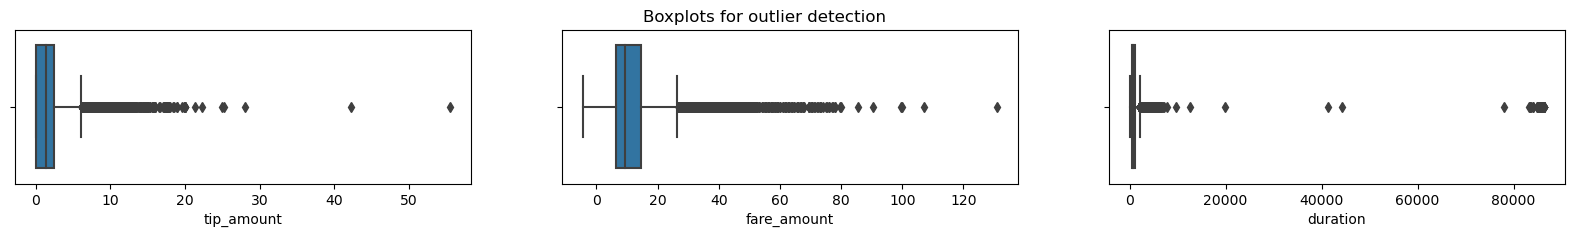

In [12]:
df = df[df['duration'] >= 0]
# Create box plot of tip_amount
fig, axes = plt.subplots(1, 3, figsize=(20, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['tip_amount'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

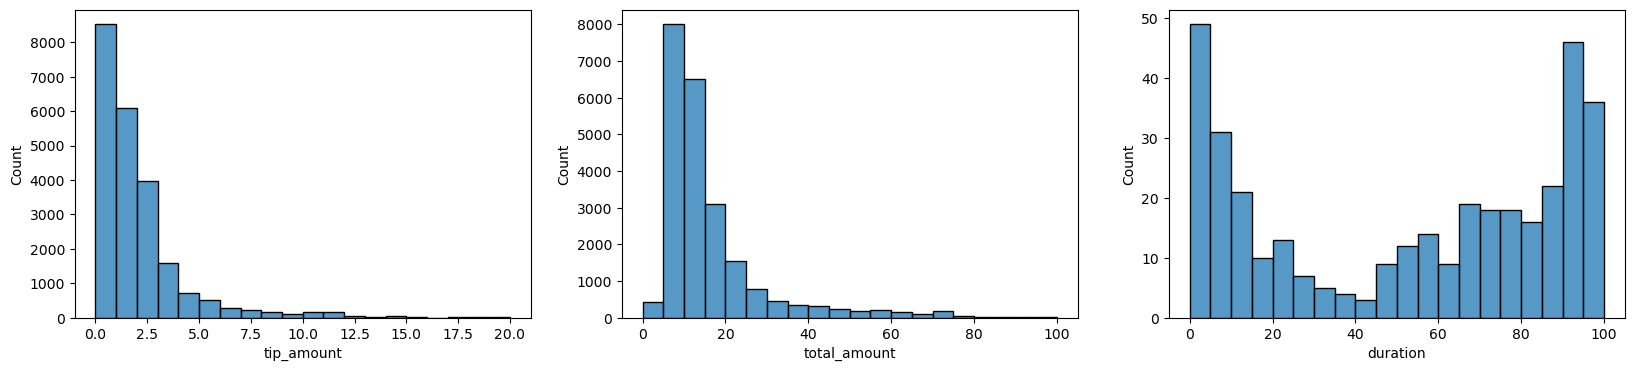

In [13]:

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1),ax=axes[0])
ax = sns.histplot(df['total_amount'], bins=range(0,101,5),ax=axes[1])
ax = sns.histplot(df['duration'], bins=range(0,101,5),ax=axes[2])


That looks like a representive distribution for each data set. Now that we have sufficantly completed our EDA we will continue

# Inital patterns and continued EDA 



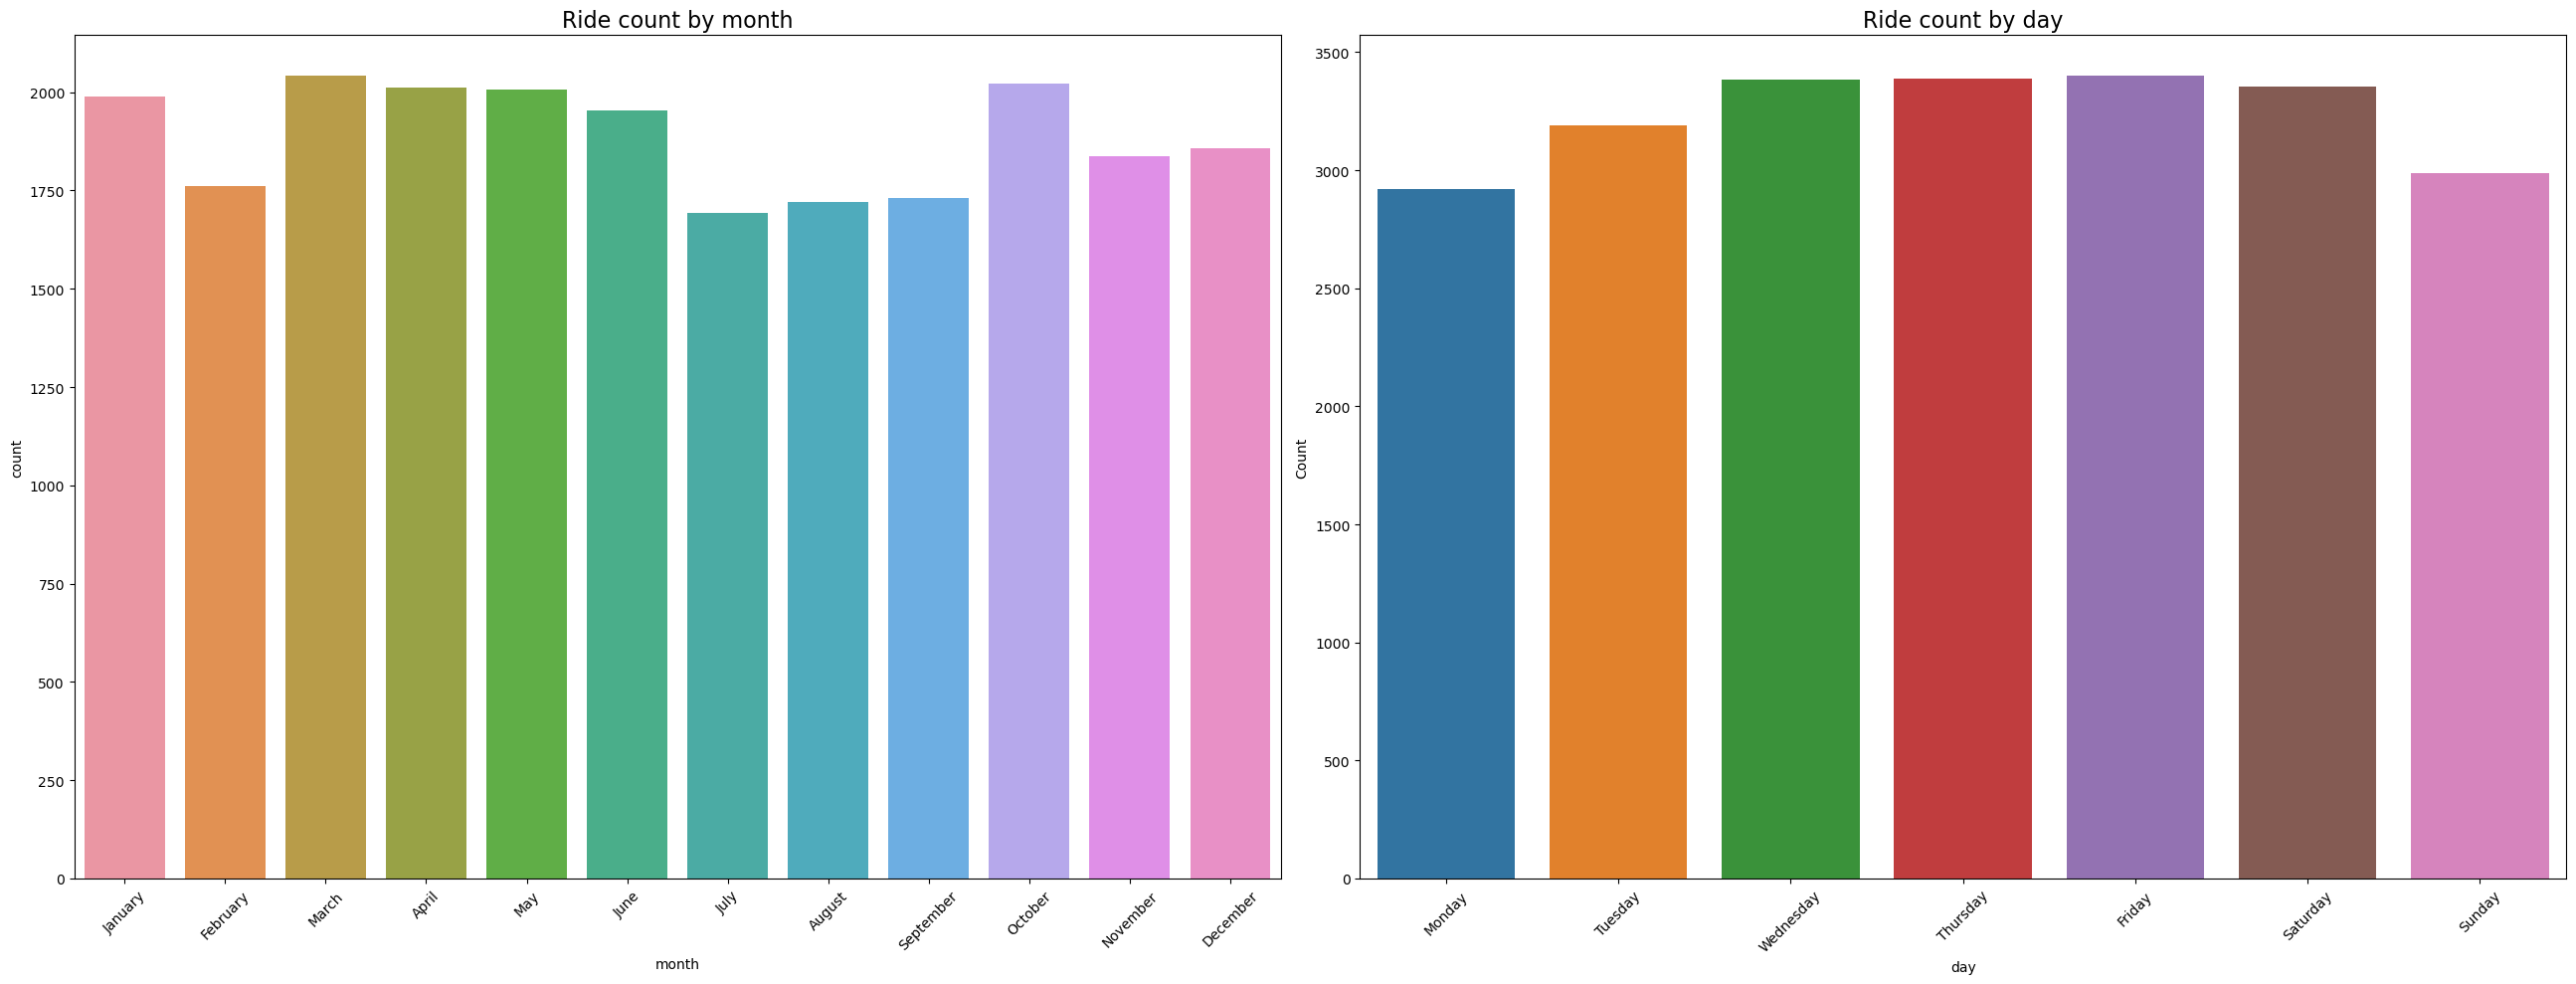

In [14]:
####ordering by month
monthly_rides = df['month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index=month_order)
####Ordering by Day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
####Plotting ride count by month
fig, axes = plt.subplots(1, 2, figsize=(26, 10))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides, ax=axes[0])
ax.set_xticklabels(monthly_rides.index, rotation=45)  
ax.set_title('Ride count by month', fontsize=16)
####Plotting ride count by day
ax = sns.barplot(x=daily_rides.index, y=daily_rides, ax=axes[1])
ax.set_xticklabels(day_order, rotation=45)  
ax.set_ylabel('Count')
ax.set_title('Ride count by day', fontsize=16)
plt.tight_layout()
plt.show()

There isnt huge variation between the days of the week or the month, howver there are small dips in the summer months of july-september and the two slowest days are monday and sunday.

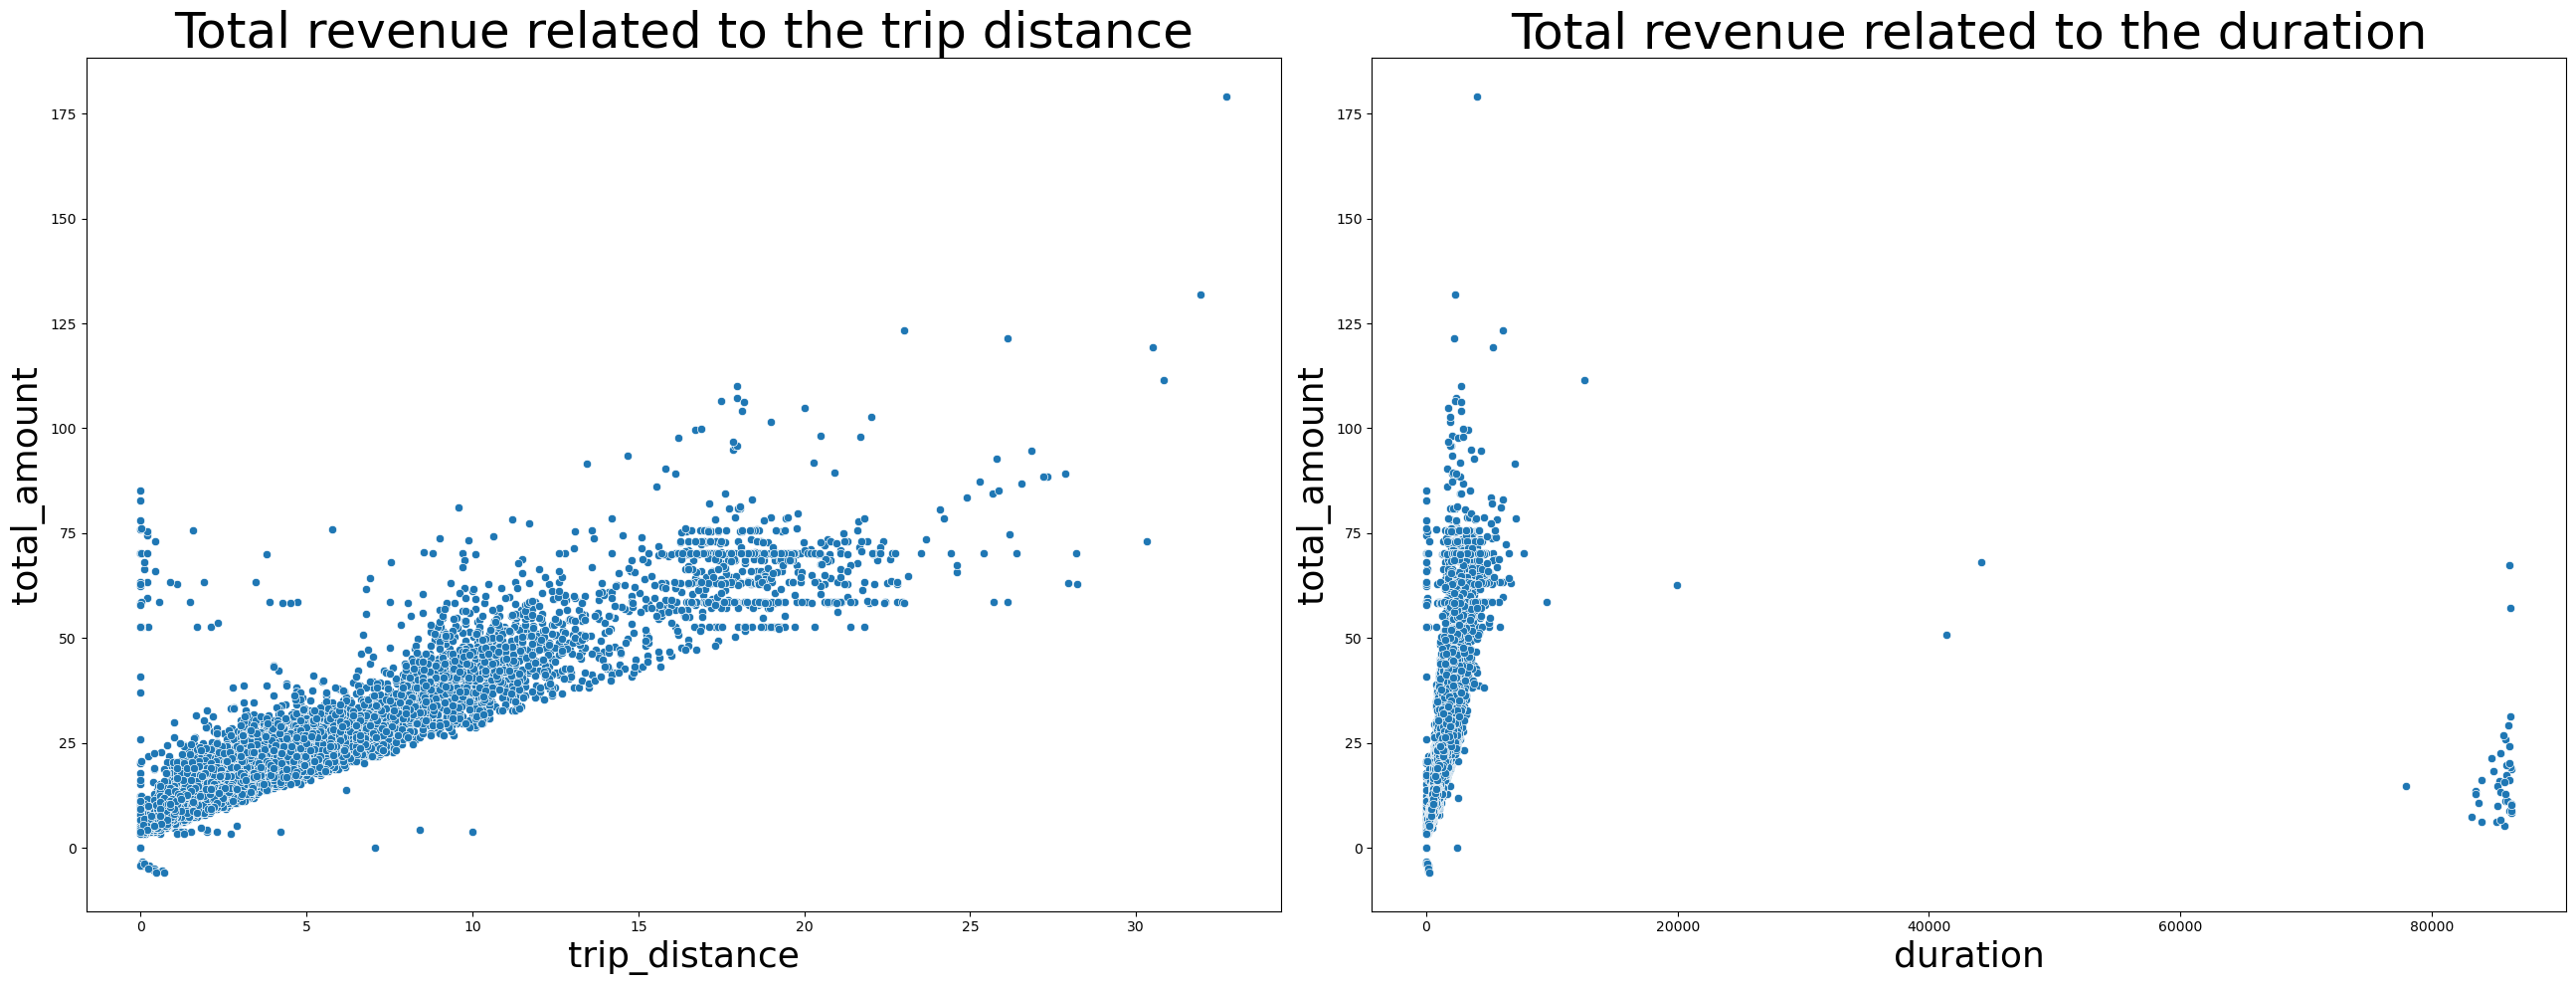

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(26, 10))

sns.scatterplot(x=df['trip_distance'], y=df['total_amount'], data=df, ax=axes[0])
axes[0].set_title('Total revenue related to the trip distance', fontsize=36)
axes[0].set_xlabel('trip_distance',fontsize=26)
axes[0].set_ylabel('total_amount',fontsize=26)

sns.scatterplot(x=df['duration'], y=df['total_amount'], data=df, ax=axes[1])
axes[1].set_title('Total revenue related to the duration', fontsize=36)
axes[1].set_xlabel('duration',fontsize=26)
axes[1].set_ylabel('total_amount',fontsize=26)

plt.tight_layout()
plt.show()

Here we notice on the left many total revenue amount with a trip distance of zero, while this could be could be completed round trips starting and ending at the same point many of these also have very short time durations of less then a minute suggesting no trip occured.

ideally we would like to follow up from where that data came from to investigate what this means, however for this case we will remove them if the trip distance is zero and the duration was less then a minute.  

on the right we notice a distinct linear trend with the total revenue increasing with duration, however there also seems to be another cluster at the far end. inorder for our regression anylisis we will remove this and potential look at them again in another model 

In [16]:
cols=['trip_distance','PULocationID', 'DOLocationID','total_amount','duration']
df[(df['trip_distance']==0)][cols].head(200)

,trip_distance,PULocationID,DOLocationID,total_amount,duration
128,0.0,231,231,20.3,7.0
246,0.0,145,145,3.8,10.0
291,0.0,132,132,4.3,26.0
319,0.0,90,90,3.8,9.0
424,0.0,208,208,10.0,27.0
...,...,...,...,...,...
22026,0.0,41,264,11.3,0.0
22043,0.0,162,162,52.8,776.0
22190,0.0,132,132,3.3,3.0
22566,0.0,264,193,0.0,3.0


In [17]:
df = df[(df['trip_distance'] != 0) | (df['duration'] > 60)]
df[(df['trip_distance']==0)][cols].head(10)

,trip_distance,PULocationID,DOLocationID,total_amount,duration
3865,0.0,13,13,6.8,453.0
3973,0.0,162,162,3.8,91.0
4462,0.0,264,264,4.3,77.0
4887,0.0,14,14,4.8,70.0
6575,0.0,100,186,4.8,65.0
8504,0.0,230,230,5.3,220.0
10281,0.0,238,238,-4.3,124.0
10923,0.0,193,193,3.8,83.0
11250,0.0,186,186,4.9,75.0
14372,0.0,226,226,5.3,268.0


well use our outlier remover fuction to replace these outliers with the maxima as discribed by Q3 +(n*IQR) which is the third quatile value pluse a multiple of the interquatile range. The second large grouping of duration we will also remove those 

In [18]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()
        
 
        
outlier_imputer(['trip_distance'],10)
outlier_imputer(['total_amount'],10)
df = df[df['duration'] <= 5000]

trip_distance
q3: 3.07
upper_threshold: 23.77
count    22535.000000
mean         2.913041
std          3.603815
min          0.000000
25%          1.000000
50%          1.620000
75%          3.070000
max         23.770000
Name: trip_distance, dtype: float64

total_amount
q3: 17.8
upper_threshold: 108.3
count    22535.000000
mean        16.075033
std         12.951134
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max        108.300000
Name: total_amount, dtype: float64



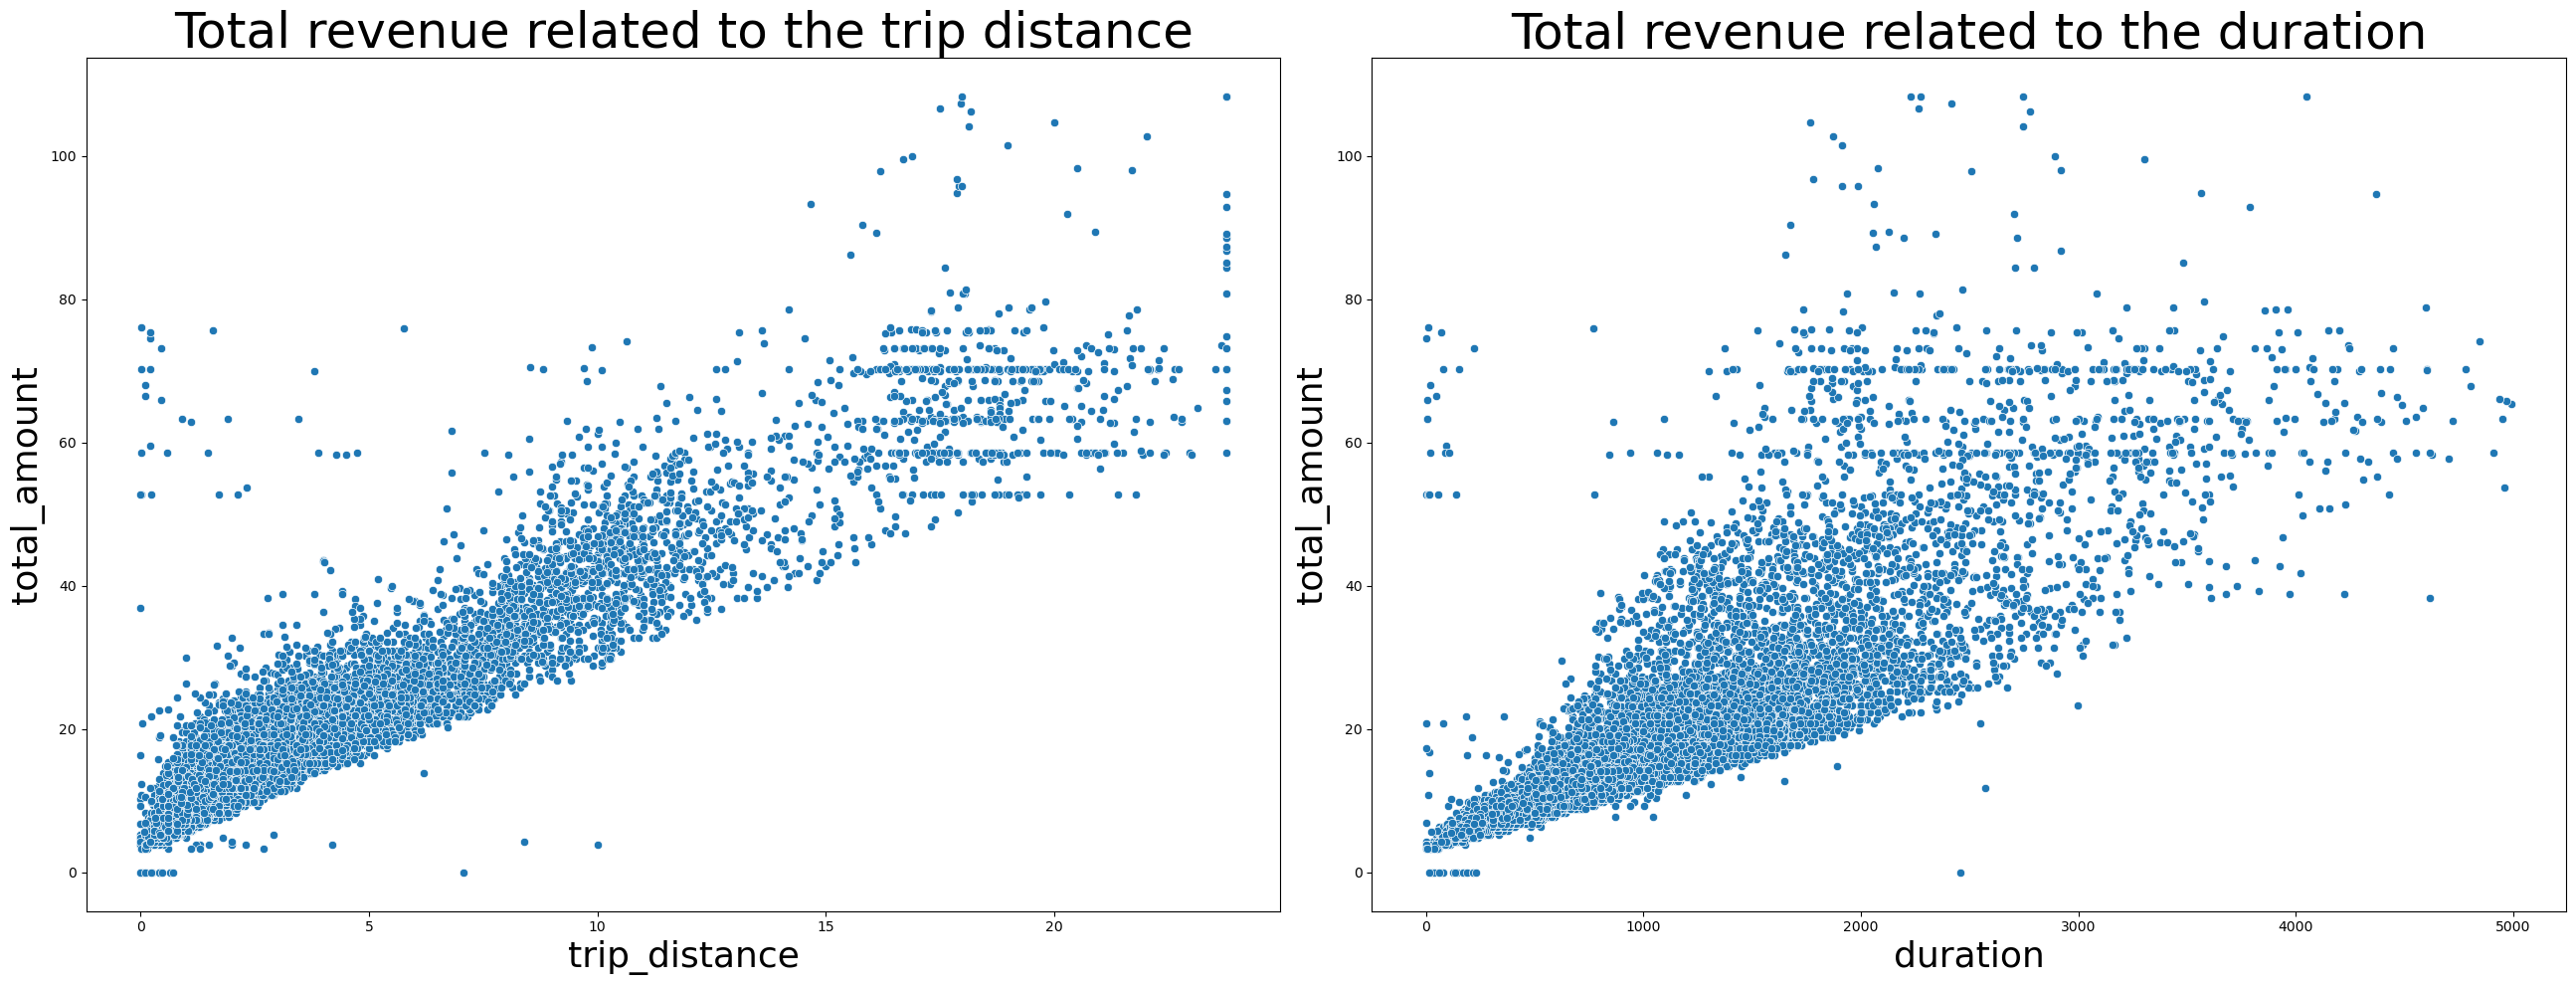

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(26, 10))

sns.scatterplot(x=df['trip_distance'], y=df['total_amount'], data=df, ax=axes[0])
axes[0].set_title('Total revenue related to the trip distance', fontsize=36)
axes[0].set_xlabel('trip_distance',fontsize=26)
axes[0].set_ylabel('total_amount',fontsize=26)

sns.scatterplot(x=df['duration'], y=df['total_amount'], data=df, ax=axes[1])
axes[1].set_title('Total revenue related to the duration', fontsize=36)
axes[1].set_xlabel('duration',fontsize=26)
axes[1].set_ylabel('total_amount',fontsize=26)

plt.tight_layout()
plt.show()

Now it looks like we are ready to preform are regression analysis. You may notice there are some strange horizontal grouping, those are the fixed rates for some routes from the airports. 

# Regression Analysis 
Here we will add a regression model looking at how the total revenue is related to trip distance and duration   

There is a strong linear corellation between the total amount and the trip distance therefor we will build a regression model using this.

However the model wont be able to know the trip distance until it is completed and there can be muliple distances given the same pick up and drop off location therefor we will have to find the average distance between all point to all points that the model will then use as the distance. 

first we need to give each pair of locations a uniqe identifiying name, we can do this by concatenating their number ids as strings 

In [20]:
#Create a new data set name for this anylisis called df_reg
df_reg=df

# Create `pickup_dropoff` column
df_reg['pickup_dropoff'] = df_reg['PULocationID'].astype(str) + ' ' + df_reg['DOLocationID'].astype(str)
df_reg['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [21]:
grouped = df_reg.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
#change format to dictionary
grouped_dict=grouped.to_dict()
grouped_dict = grouped_dict['trip_distance']

# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df_reg['mean_distance']=df_reg['pickup_dropoff']
# 2. Map `grouped_dict` to the `mean_distance` column
df_reg['mean_distance'] = df_reg['mean_distance'].map(grouped_dict)
df_reg.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,844.0,March,Saturday,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,1590.0,April,Tuesday,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,432.0,December,Friday,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,1815.0,May,Sunday,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,1003.0,April,Saturday,4 112,4.435000


In [22]:
###Repeat the procces for duration
grouped2=df_reg.groupby('pickup_dropoff')['duration'].mean()
grouped_dict=grouped2.to_dict()
df_reg['mean_duration']=df_reg['pickup_dropoff']
df_reg['mean_duration'] = df_reg['mean_duration'].map(grouped_dict)
df_reg.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,844.0,March,Saturday,100 231,3.521667,1370.833333
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,1590.0,April,Tuesday,186 43,3.108889,1468.222222
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,432.0,December,Friday,262 236,0.881429,435.000000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,1815.0,May,Sunday,188 97,3.700000,1815.000000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,1003.0,April,Saturday,4 112,4.435000,877.000000


c:\Users\Tyler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


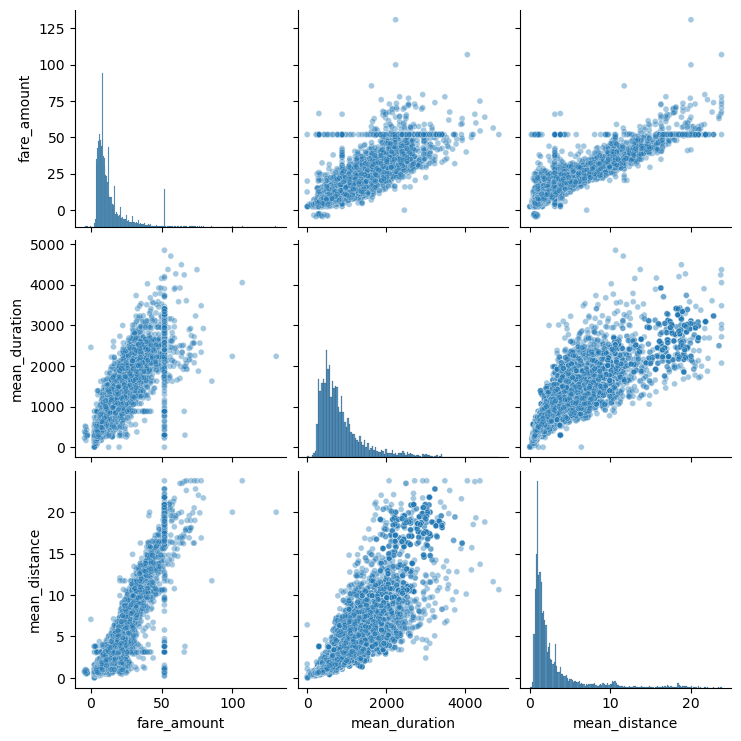

In [23]:
sns.pairplot(df_reg[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

All these varible appear to linear correlations with eacg other and homoscedasticity therefor we can continue. let confirm this correlation below.

In [24]:
#remove variable we dont need
df_reg = df_reg.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month', 'VendorID'], axis=1)



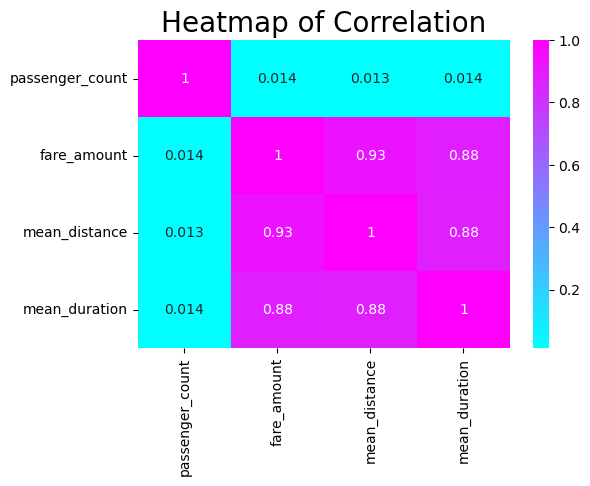

In [25]:
# Create correlation matrix containing pairwise correlation of columns
df_reg.corr()
# Create correlation heatmap
plt.figure(figsize=(6,4))
plt.title('Heatmap of Correlation',fontsize=20)
sns.heatmap(df_reg.corr(method='pearson'), annot=True, cmap='cool')
plt.show()
# if you know a better way to color this heatmap please let me know i hate all these color options

As expected we see Fare amount, mean distance and mean duration are all highly correlated . Now lets build the model with our target varible being the fare amount

In [26]:
# Remove the target column from the features
X = df_reg.drop(columns=['fare_amount'])
# Set y variable
y = df_reg[['fare_amount']]

#create the teing and training sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [27]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.884758866273763
R^2: 0.884758866273763
MAE: 1.9812882534816516
MSE: 12.07791927045674
RMSE: 3.4753300951789803


In [28]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8855799177618211
R^2: 0.8855799177618211
MAE: 2.0395662317725827
MSE: 12.283868672310133
RMSE: 3.504835042096865


We see a good preformence on both the test and trained sets suggesting there is little bias and the model didnt overfit to the training set. our R squared for both sets was 0.88 so 88% of the fare amount can be described by the model 

In [29]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head(10)

,actual,predicted,residual
19639,13.5,10.624891,2.875109
13873,16.5,17.560523,-1.060523
17372,4.5,7.245799,-2.745799
10818,7.5,11.107214,-3.607214
11174,8.5,11.032599,-2.532599
9531,14.5,14.939684,-0.439684
2673,10.5,9.322531,1.177469
16121,24.0,19.035193,4.964807
16276,5.0,6.839570,-1.839570
14249,7.5,5.170195,2.329805


we see our model can acurattly predict the fair amount to with an mean error of about 2 dollars seen here and the mean absolute error found above 

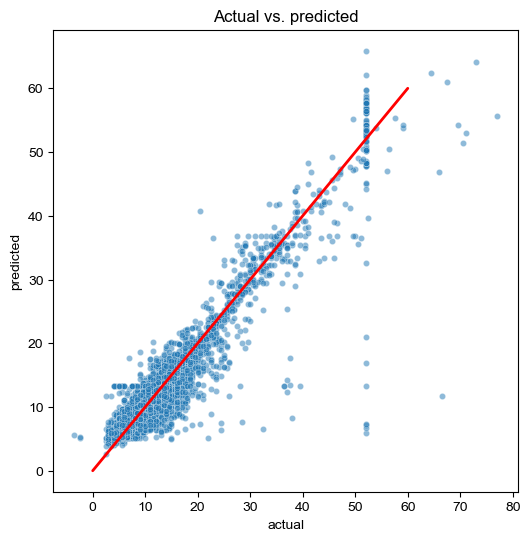

In [30]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

With an actual vs predicted scatter plot a near perfect prediction level would look like a straight 1 to 1 line which we are close to here.

it looks like the largest variance is a result of the set standard rate from the airport we saw ealier. perhaps removing these or defining these differently would help in the predictions 

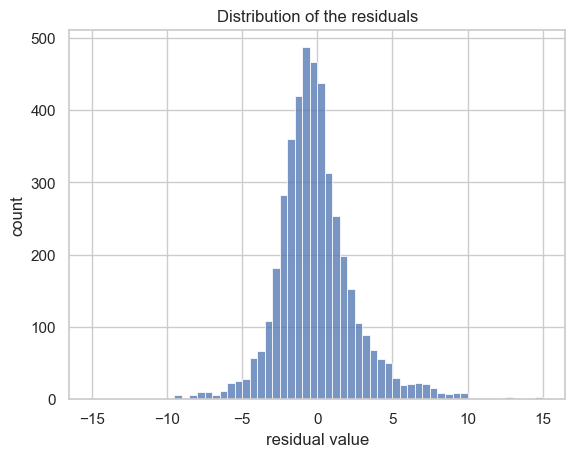

In [31]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

we see here the residuals or error in the predicted values form a normal distibution around 0. this is good as it shows its not biased to over or under predict. 

we can see this further below with a scatter plot of the error by predicted value, again those standard rates seem to be the largest contributing factor to the varience 

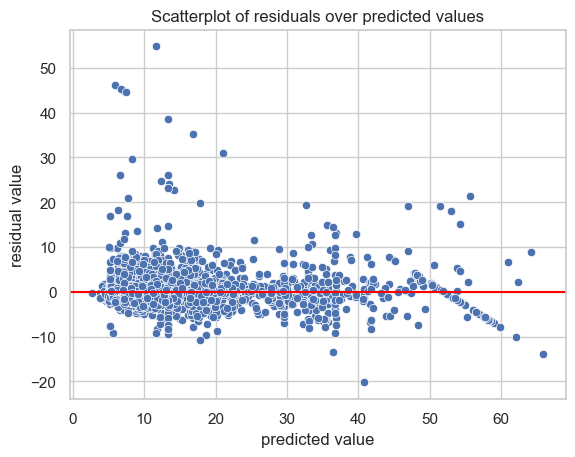

In [32]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [33]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration
0,0.013769,6.948993,2.938482


This shows the mean distance was the largest determining factor in determine fare amount. Dividing the mean distance coefficent by the standard deviation below gives us the rate per mile. Therefor for every mile traveled we can expect a total payment of around 2 dollars 

In [34]:
print(7.133867 / X_train['mean_distance'].std())


2.060790074424057


In [35]:
#lets get the predicted fare amount on all values for the next part
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

final_preds = final_preds['y_preds_full']

# Combine means columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,1370.833333,3.521667,16.696309
1,1468.222222,3.108889,16.313240
2,435.000000,0.881429,6.543894
3,1815.000000,3.700000,19.277965
4,877.000000,4.435000,15.943835


# insights 


We found as one would expect that ride distance has the largest effect one total fare amount, that was including any tips and tolls. With the models scores of

R squared = 0.88 
mean absolute error = 2
mean squared error = 12.3
root mean square error = 3.5

the rate increase by mile traveled was 2.06. 

With this information cab drivers could potentially accuretly predict if a particular ride is likely to be more or less profitable. It could be seen in real time how an inital far drive to pick up a customer would be worth it if there final distination is far enough away. 

this information could be implemented into an app for drivers to see and choose the best customers to pick up.

There may be some ethical concerns implementing this as it could essentailly leave people without a ride if there potential fare amount minus the cost to pick up is not seen as satisfactory. 




# Machine Learning Model
    Lets now implemnt a machine learning algoithim to discover any hidden connection not found in the regression model to better predict profitable rides

In [36]:
#lets start by adding some of the calculated columns from our regresion 
df[['mean_distance', 'mean_duration']] = df_reg[['mean_distance', 'mean_duration']]
df['predicted_fare']=nyc_preds_means['predicted_fare']

For our decision tree we need a binary answer for it to aim for. since we already have a good idea how to determine overall fare cost we'll make our decion tree model try to find the parameters to find find the best tippers. to do this we'll split it by a tip percent where anything over 20% will be considered generous. Doing it this Could insentivise drivers to pick up generous tipper while not having the problem of less generous tippers being avoided. as the tippers over 20% will be a minority.

if the model was flipped around to find the lowest or no tipper the drivers may essentialy not provided service to those or people the model predicted to be in that catagory. Since tipping should be seen as an added incentive not requirment we will only be looking to find the best tippers.

In [37]:
# Create tip % col
df['tip_percent'] = round(df['tip_amount'] / (df['total_amount'] - df['tip_amount']), 3)

# Create 'generous' col (target)
df['generous'] = (df['tip_percent']>= 0.2).astype(int)

# Drop columns we dont think could determine tip percent
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag',
              'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge','tip_percent','total_amount']

df_tree = df.drop(drop_cols, axis=1)

In [38]:
#Define list of cols to convert to string so we can give them uniqe encoded variables
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

#Convert each column to string
for col in cols_to_str:
    df_tree[col] = df_tree[col].astype('str')

# Convert categoricals to binary
df_tree = pd.get_dummies(df_tree, drop_first=True)

In [39]:
# Get class balance of 'generous' col
df_tree['generous'].value_counts(normalize=True)

#Isolate target variable (y)
y = df_tree['generous']

# Isolate the features (X)
X = df_tree.drop('generous', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [40]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [41]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to search through
param_grid = {
    'max_depth': [5],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train a new model using the best parameters
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)
dt_pred = grid_search.predict(X_test)

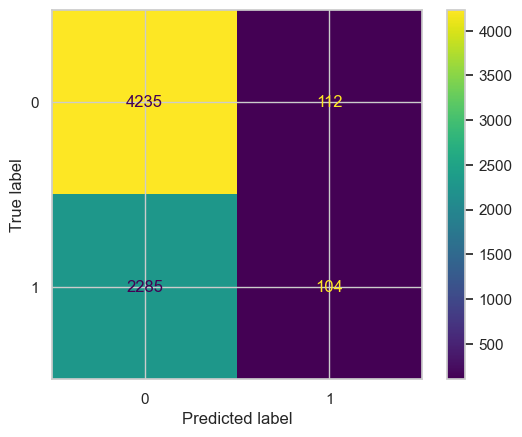

In [42]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

In [43]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.644151
Precision: 0.481481
Recall: 0.043533
F1 Score: 0.079846


These are not great metrics so we will attempt to improve this later by testing more hyper parameters. 

Below is a visual representation of how the decision tree works 

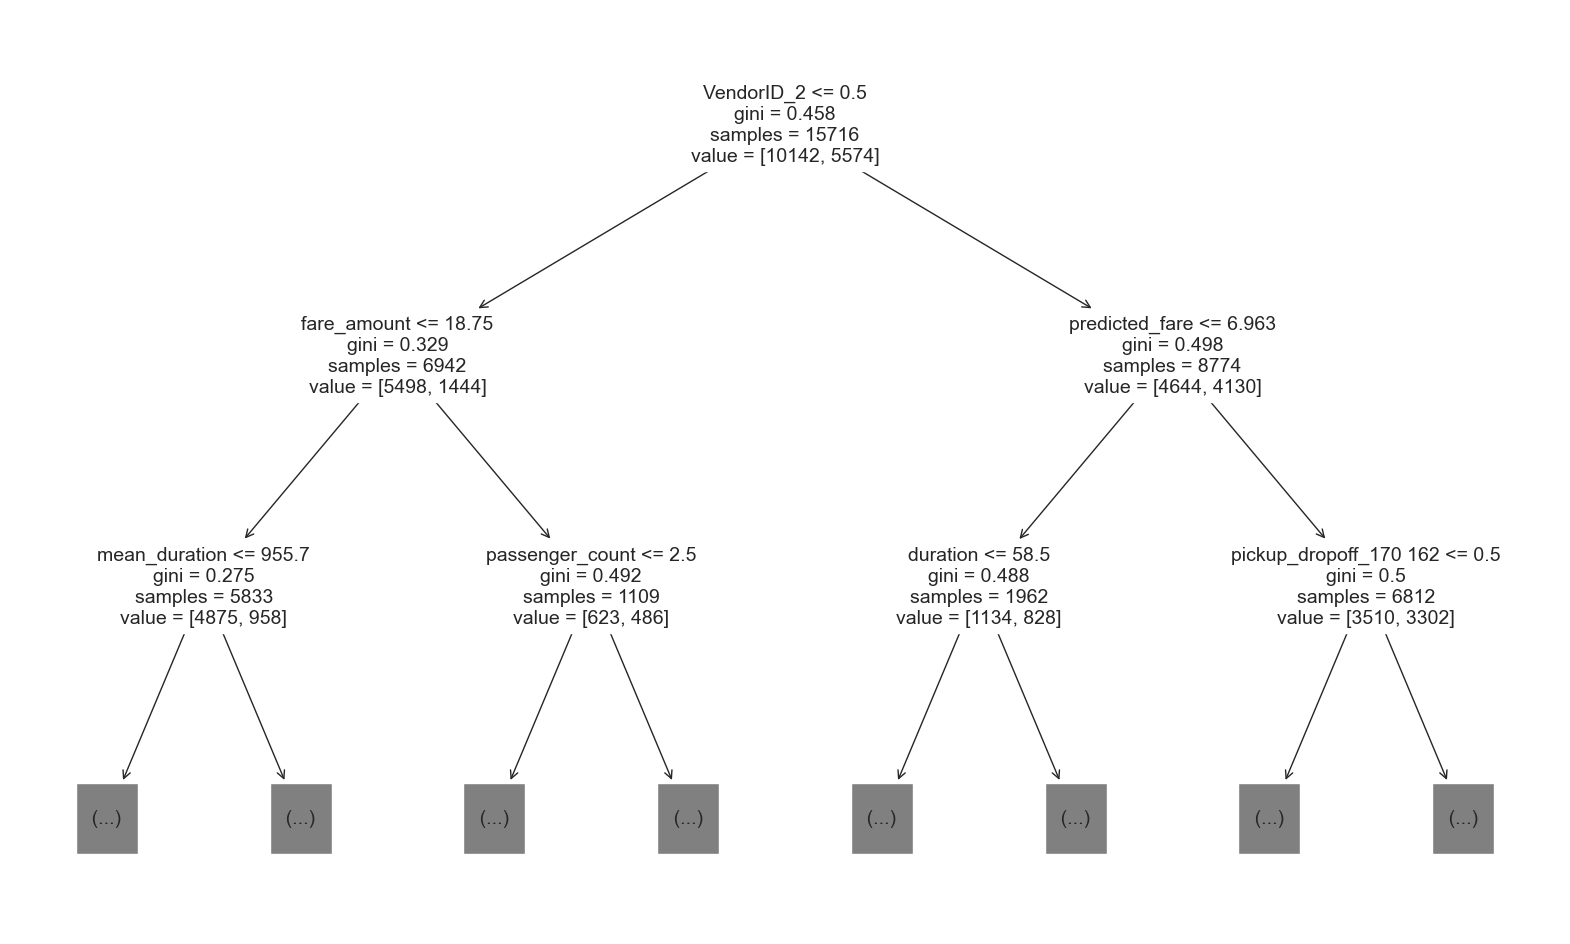

In [44]:
Xlist = list(X.columns)
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=Xlist)
plt.show()

## random Forest

Lets improve the previous model by doing two things
First we will find the best parameters in the Best_Parms file, testing over many different paremeters with the aim of improving accuracy, precision f1 and recall combined to get a while rounded model.

we will also switch to a random forest model essentially a large collection of desion trees to avoid over fitting the model to the training data.

In [45]:
#'data to read'
data = df_tree 
%store data

Stored 'data' (DataFrame)


The test to find the best parameters can be very computational expensive and time consuming so i changed it to a seperate file that we can import and export the relavent data in so we dont have to run it again every time we change anything

In [46]:
# Retrieve the stored list of best parameters found
%store -r best_parms

# Convert the list of tuples back to a dictionary
best_params_dict = dict(best_parms)

In [47]:
#Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

#Create a dictionary of hyperparameters to tune 
cv_params = best_params_dict


#Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

#Instantiate the GridSearchCV object
#rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')
rf_best = RandomForestClassifier(**best_params_dict, random_state=42)


In [48]:
%%time
rf_best.fit(X_train, y_train)

CPU times: total: 1min 29s
Wall time: 2min 6s


RandomForestClassifier(criterion='entropy', max_depth=28, max_features=None,
                       min_samples_leaf=6, min_samples_split=15,
                       random_state=42)

In [49]:
# evaluate the models metrics 
# Predict labels using the trained model
y_pred = rf_best.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, F1-score, and accuracy
precision = report['accuracy']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")

Accuracy: 0.6536520190023754
Precision: 0.6536520190023754
Recall: 0.5748817788146596
F1-score: 0.571390657023215


This is a great increase from our previous model, while not perfect it does a good job a predicting if a customer will be 'generous' or not. 

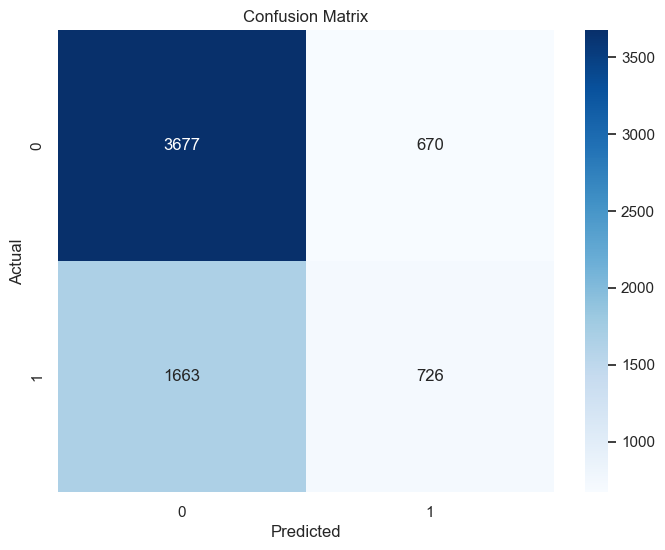

In [50]:
# Predict labels using the trained model
y_pred = rf_best.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Top 12 features:
1. VendorID_2 (0.17629610205656895)
2. duration (0.15772105529088667)
3. fare_amount (0.11167217211176521)
4. mean_duration (0.10842886743037097)
5. mean_distance (0.10154797813585362)
6. predicted_fare (0.09728045744413809)
7. passenger_count (0.024425679545782775)
8. day_Thursday (0.008194562417598333)
9. day_Wednesday (0.007682222433202492)
10. day_Saturday (0.007252984886800779)
11. day_Sunday (0.0070360913678865575)
12. day_Monday (0.006506979955647596)


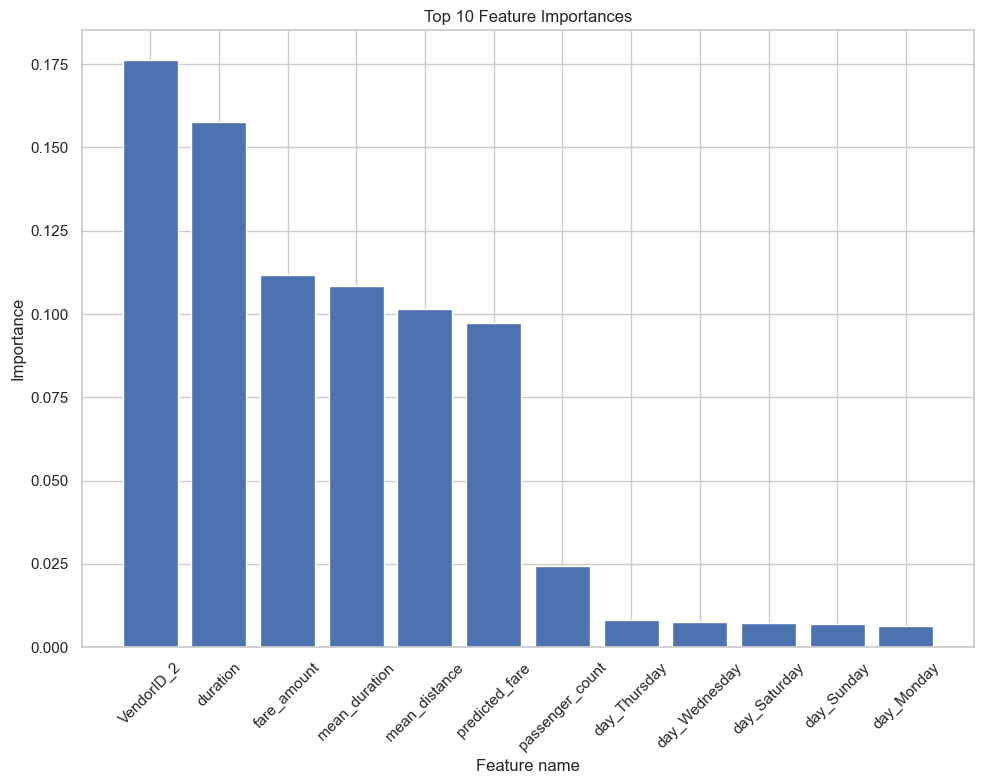

In [51]:
feature_names = X.columns.tolist()
# Get feature importances
importances = rf_best.feature_importances_

# Get the indices that would sort the importances array
indices = importances.argsort()[::-1]

# Display the top 10 features
top_features = 12
print(f"Top {top_features} features:")
for f in range(top_features):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plotting the top 10 feature importances with feature names
plt.figure(figsize=(10, 8))
plt.title("Top 10 Feature Importances")
plt.bar(range(top_features), importances[indices[:top_features]], align="center")
plt.xticks(range(top_features), [feature_names[i] for i in indices[:top_features]], rotation=45)
plt.xlabel("Feature name")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

From models feature importance we see that vendorID2 has the greatest importance in determining if the customer will be 'generous' or not. The vendor ids are the type of Taxicab Technology Service Provider, and its clear the second one VeriFone Inc has a large impact on if the costmer tips or not. Why that is we are not able to see with the avalible data but would be safe to say switching exculivly to vendor 2 would provide better tips for the drivers. 

The overall duration of the trip has the next greatest importance, more importantly our predicted fare values has a large importance. About as well as the actual fare amount. letting our previous model of predicting the fare also potential be a good tool for choosing the best tippers for the drivers. 